## TP3: Reconnaissance de signaux de communication par apprentissage profond

Students:
- Mathilde Dupouy
- Balthazar Neveu

In [ ]:
# %general imports
from data_loader import get_data, SignalsDataset, SAMPLE_DATA_PATH

from visualization import visualize_signals
from random import randint
interactive_flag = True
try:
    from ipywidgets import interact, IntSlider, fixed
    interactive_flag *= True
except:
    interactive_flag = False

%load_ext autoreload
%autoreload 2

# Data loader
@TODO: comment on data, label_dict

In [ ]:
# % data loading from disk
signals, snr, labels_id, label_dict = get_data()
data_in = [signals, snr, labels_id, label_dict]

In [ ]:
# % interactive visualization
data_in = [signals, snr, labels_id, label_dict]
if interactive_flag:
    interact(
        visualize_signals,
        data_in = fixed(data_in),
        idx=IntSlider(min=0, max=signals.shape[0]-1, step=1))
else:
    for idx in range(5):
        visualize_signals(data_in = data_in, idx=randint(0, signals.shape[0]-1))

In [ ]:
# % check toy dataloader
from data_loader import get_data, SignalsDataset, SAMPLE_DATA_PATH
from torch.utils.data import DataLoader
N = 8  # batch size
C = 2 # number of channels
T = 2048 # signal length


dataset = SignalsDataset(SAMPLE_DATA_PATH)
train_dataloader = DataLoader(dataset, batch_size=8, shuffle=False)
batch_signal, batch_labels = next(iter(train_dataloader))
assert batch_signal.shape == (N, C, T) # A batch shall be a 8, 2, 2048 tensor

## Vanilla classifier

In [44]:
from model import VanillaClassifier
%load_ext autoreload
%autoreload 2

device = "cuda"
model = VanillaClassifier()
def sanity_check():
# model.to(device)
# Sanity check on inference
    pred = model(batch_signal)
    print(pred.shape, batch_labels.shape)
    import torch
    loss = torch.nn.CrossEntropyLoss()
    loss(pred, batch_labels[:, 0])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from training import train
from data_loader import get_dataloaders
dataloaders = get_dataloaders()



In [ ]:
import torch
torch.cuda.is_available()

In [45]:
model, training_losses, valid_losses, valid_accuracies  = train(model, batch_sizes=(256, 512), n_epochs=50)

Epoch 0: 100%|██████████| 118/118 [00:02<00:00, 56.05it/s]
/home/bneveu/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


epoch=0 | training_loss=1.910 | valid_loss=1.88 | 16.530000%


Epoch 1: 100%|██████████| 118/118 [00:01<00:00, 60.07it/s]


epoch=1 | training_loss=1.855 | valid_loss=1.83 | 16.560000%


Epoch 2: 100%|██████████| 118/118 [00:01<00:00, 63.83it/s]


epoch=2 | training_loss=1.816 | valid_loss=1.81 | 16.670000%


Epoch 3: 100%|██████████| 118/118 [00:01<00:00, 61.14it/s]


epoch=3 | training_loss=1.796 | valid_loss=1.79 | 19.630000%


Epoch 4: 100%|██████████| 118/118 [00:01<00:00, 62.75it/s]


epoch=4 | training_loss=1.782 | valid_loss=1.78 | 23.920000%


Epoch 5: 100%|██████████| 118/118 [00:02<00:00, 57.10it/s]


epoch=5 | training_loss=1.769 | valid_loss=1.76 | 27.930000%


Epoch 6: 100%|██████████| 118/118 [00:01<00:00, 62.55it/s]


epoch=6 | training_loss=1.751 | valid_loss=1.74 | 29.270000%


Epoch 7: 100%|██████████| 118/118 [00:01<00:00, 60.89it/s]


epoch=7 | training_loss=1.728 | valid_loss=1.72 | 29.860000%


Epoch 8: 100%|██████████| 118/118 [00:01<00:00, 62.37it/s]


epoch=8 | training_loss=1.697 | valid_loss=1.68 | 30.000000%


Epoch 9: 100%|██████████| 118/118 [00:01<00:00, 62.89it/s]


epoch=9 | training_loss=1.658 | valid_loss=1.64 | 30.850000%


Epoch 10: 100%|██████████| 118/118 [00:01<00:00, 63.01it/s]


epoch=10 | training_loss=1.612 | valid_loss=1.59 | 31.630000%


Epoch 11: 100%|██████████| 118/118 [00:01<00:00, 63.75it/s]


epoch=11 | training_loss=1.562 | valid_loss=1.54 | 32.290000%


Epoch 12: 100%|██████████| 118/118 [00:01<00:00, 61.96it/s]


epoch=12 | training_loss=1.511 | valid_loss=1.49 | 32.240000%


Epoch 13: 100%|██████████| 118/118 [00:01<00:00, 62.25it/s]


epoch=13 | training_loss=1.462 | valid_loss=1.44 | 32.920000%


Epoch 14: 100%|██████████| 118/118 [00:01<00:00, 62.33it/s]


epoch=14 | training_loss=1.419 | valid_loss=1.4 | 33.310000%


Epoch 15: 100%|██████████| 118/118 [00:01<00:00, 64.87it/s]


epoch=15 | training_loss=1.383 | valid_loss=1.37 | 33.650000%


Epoch 16: 100%|██████████| 118/118 [00:01<00:00, 62.59it/s]


epoch=16 | training_loss=1.353 | valid_loss=1.34 | 34.180000%


Epoch 17: 100%|██████████| 118/118 [00:01<00:00, 62.77it/s]


epoch=17 | training_loss=1.329 | valid_loss=1.32 | 34.450000%


Epoch 18: 100%|██████████| 118/118 [00:01<00:00, 63.01it/s]


epoch=18 | training_loss=1.309 | valid_loss=1.3 | 34.390000%


Epoch 19: 100%|██████████| 118/118 [00:02<00:00, 56.54it/s]


epoch=19 | training_loss=1.293 | valid_loss=1.29 | 34.400000%


Epoch 20: 100%|██████████| 118/118 [00:01<00:00, 63.07it/s]


epoch=20 | training_loss=1.280 | valid_loss=1.28 | 34.740000%


Epoch 21: 100%|██████████| 118/118 [00:01<00:00, 62.58it/s]


epoch=21 | training_loss=1.269 | valid_loss=1.27 | 34.870000%


Epoch 22: 100%|██████████| 118/118 [00:01<00:00, 60.61it/s]


epoch=22 | training_loss=1.260 | valid_loss=1.26 | 34.960000%


Epoch 23: 100%|██████████| 118/118 [00:01<00:00, 60.99it/s]


epoch=23 | training_loss=1.252 | valid_loss=1.25 | 35.040000%


Epoch 24: 100%|██████████| 118/118 [00:02<00:00, 56.96it/s]


epoch=24 | training_loss=1.245 | valid_loss=1.24 | 35.030000%


Epoch 25: 100%|██████████| 118/118 [00:01<00:00, 62.62it/s]


epoch=25 | training_loss=1.239 | valid_loss=1.24 | 35.020000%


Epoch 26: 100%|██████████| 118/118 [00:01<00:00, 60.17it/s]


epoch=26 | training_loss=1.234 | valid_loss=1.23 | 34.890000%


Epoch 27: 100%|██████████| 118/118 [00:01<00:00, 64.29it/s]


epoch=27 | training_loss=1.229 | valid_loss=1.23 | 34.890000%


Epoch 28: 100%|██████████| 118/118 [00:01<00:00, 65.27it/s]


epoch=28 | training_loss=1.225 | valid_loss=1.22 | 34.870000%


Epoch 29: 100%|██████████| 118/118 [00:01<00:00, 62.81it/s]


epoch=29 | training_loss=1.221 | valid_loss=1.22 | 34.880000%


Epoch 30: 100%|██████████| 118/118 [00:01<00:00, 63.12it/s]


epoch=30 | training_loss=1.217 | valid_loss=1.22 | 34.730000%


Epoch 31: 100%|██████████| 118/118 [00:01<00:00, 62.51it/s]


epoch=31 | training_loss=1.214 | valid_loss=1.21 | 34.590000%


Epoch 32: 100%|██████████| 118/118 [00:01<00:00, 62.11it/s]


epoch=32 | training_loss=1.211 | valid_loss=1.21 | 34.470000%


Epoch 33: 100%|██████████| 118/118 [00:02<00:00, 57.30it/s]


epoch=33 | training_loss=1.209 | valid_loss=1.21 | 34.650000%


Epoch 34: 100%|██████████| 118/118 [00:01<00:00, 65.32it/s]


epoch=34 | training_loss=1.206 | valid_loss=1.2 | 34.730000%


Epoch 35: 100%|██████████| 118/118 [00:01<00:00, 62.65it/s]


epoch=35 | training_loss=1.204 | valid_loss=1.2 | 34.760000%


Epoch 36: 100%|██████████| 118/118 [00:01<00:00, 61.78it/s]


epoch=36 | training_loss=1.201 | valid_loss=1.2 | 34.950000%


Epoch 37: 100%|██████████| 118/118 [00:01<00:00, 64.37it/s]


epoch=37 | training_loss=1.199 | valid_loss=1.2 | 35.120000%


Epoch 38: 100%|██████████| 118/118 [00:02<00:00, 57.34it/s]


epoch=38 | training_loss=1.197 | valid_loss=1.2 | 35.240000%


Epoch 39: 100%|██████████| 118/118 [00:01<00:00, 61.91it/s]


epoch=39 | training_loss=1.195 | valid_loss=1.19 | 35.530000%


Epoch 40: 100%|██████████| 118/118 [00:01<00:00, 62.48it/s]


epoch=40 | training_loss=1.193 | valid_loss=1.19 | 35.570000%


Epoch 41: 100%|██████████| 118/118 [00:01<00:00, 62.41it/s]


epoch=41 | training_loss=1.191 | valid_loss=1.19 | 35.700000%


Epoch 42: 100%|██████████| 118/118 [00:01<00:00, 61.60it/s]


epoch=42 | training_loss=1.190 | valid_loss=1.19 | 35.790000%


Epoch 43: 100%|██████████| 118/118 [00:01<00:00, 62.92it/s]


epoch=43 | training_loss=1.188 | valid_loss=1.19 | 35.840000%


Epoch 44: 100%|██████████| 118/118 [00:01<00:00, 61.95it/s]


epoch=44 | training_loss=1.186 | valid_loss=1.18 | 35.920000%


Epoch 45: 100%|██████████| 118/118 [00:01<00:00, 62.53it/s]


epoch=45 | training_loss=1.185 | valid_loss=1.18 | 35.980000%


Epoch 46: 100%|██████████| 118/118 [00:01<00:00, 61.00it/s]


epoch=46 | training_loss=1.183 | valid_loss=1.18 | 36.050000%


Epoch 47: 100%|██████████| 118/118 [00:02<00:00, 56.64it/s]


epoch=47 | training_loss=1.182 | valid_loss=1.18 | 36.110000%


Epoch 48: 100%|██████████| 118/118 [00:01<00:00, 63.27it/s]


epoch=48 | training_loss=1.180 | valid_loss=1.18 | 36.190000%


Epoch 49: 100%|██████████| 118/118 [00:01<00:00, 61.80it/s]


epoch=49 | training_loss=1.179 | valid_loss=1.18 | 36.210000%


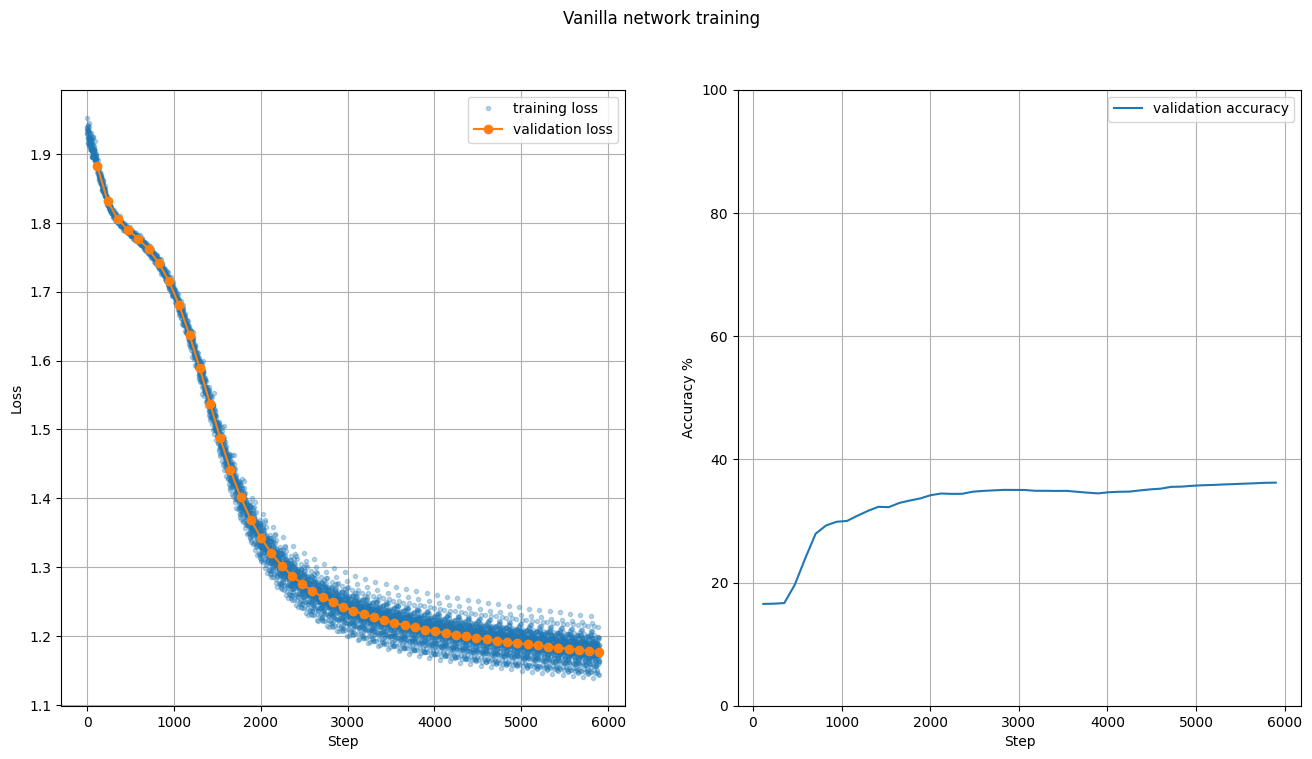

In [60]:
import matplotlib.pyplot as plt
import numpy as np
epoch_length = len(training_losses)/len(valid_losses)
epoch_steps = np.linspace(epoch_length, len(training_losses), len(valid_losses)) 

fig, axs = plt.subplots(ncols=2, figsize=(16, 8))
axs[0].plot(training_losses, ".", alpha=0.3, label="training loss")

axs[0].plot(epoch_steps, valid_losses,  "-o", label="validation loss")

axs[0].set_xlabel("Step")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid()

axs[1].plot(epoch_steps, 100*np.array(valid_accuracies),  "-", label="validation accuracy")
axs[1].set_xlabel("Step")
axs[1].set_ylabel("Accuracy %")
axs[1].legend()
axs[1].grid()
axs[1].set_ylim(0, 100)
plt.suptitle("Vanilla network training")
plt.show()